In [1]:
import pandas as pd

In [6]:
df=pd.read_csv("C:/Users/LenovO/Desktop/bank-additional-full.csv")

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
plt.rcParams["figure.figsize"] = (8, 6)

In [9]:
pip install warnings

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement warnings (from versions: none)
ERROR: No matching distribution found for warnings


In [10]:
pip install ploty

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement ploty (from versions: none)
ERROR: No matching distribution found for ploty


In [11]:
import warnings
warnings.filterwarnings('ignore')

import plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot
init_notebook_mode(connected=True)

In [12]:
# The target feature shows a positive behavior of a phone call during the marketing campaign.
## For easier analysis, we will be mapping positive outcome as 1 and negative outcome as 0

In [13]:
d = {"no": 0, "yes": 1}
df["y"] = df["y"].map(d)

In [14]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [15]:
df.shape

(4119, 21)

# Analysing Age Distribution

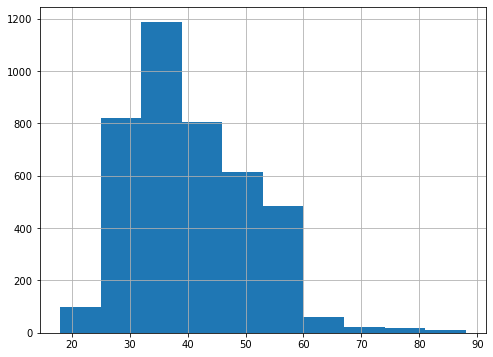

In [16]:
df["age"].hist()
plt.savefig('AgeDist')

In [17]:
# The histogram shows that most of our clients are between the ages of 25 and 50, which corresponds to the actively working part of the population.

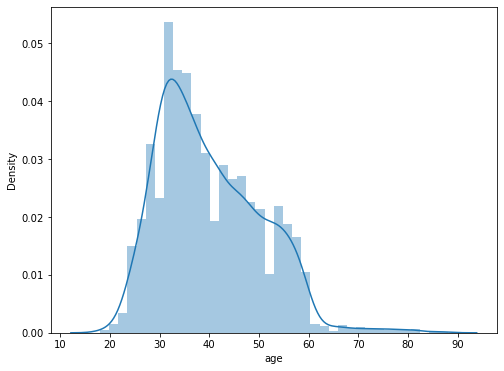

In [18]:
# Analysing the age distribution using distribution plot
sns.distplot(df.age)
plt.savefig('AgeDistPlot')

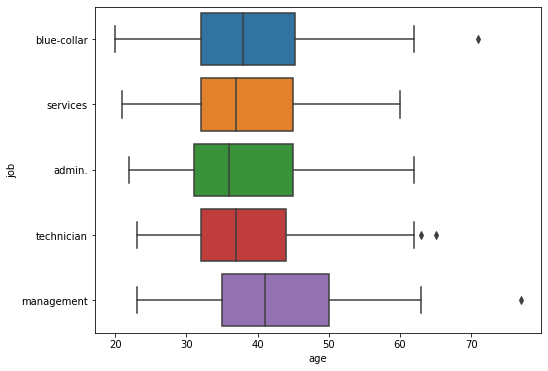

In [19]:
# COMPARING AGE OF CUSTOMERS OF TOP 5 JOBS 

top_jobs = (
    df.job.value_counts().sort_values(ascending=False).head(5).index.values
)
sns.boxplot(
    y="job", x="age", data=df[df.job.isin(top_jobs)], orient="h"
)
plt.savefig('Boxplt')

# The plot shows that among the top-5 client categories by the type of employment, the most senior customers represent the management, and the largest number of outliers is among the categories of admin. and technician.

In [20]:
# Identifying correlation between martial status, job with the degree of attraction by using heatmap

ValueError: Unknown format code 'd' for object of type 'float'

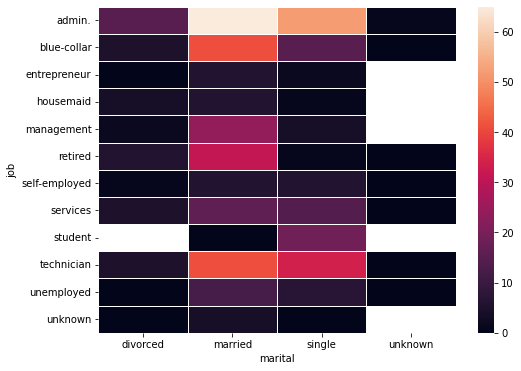

In [21]:
job_marital_y = (
    df.pivot_table(
        index="job", columns="marital", values="y", aggfunc=sum
    )
)
sns.heatmap(job_marital_y, annot=True, fmt="d", linewidths=0.5)
plt.savefig('CorrelationHeatMap')

# Building Interactive Charts with Plotly

In [26]:
age_df = (
    df.groupby("age")[["y"]]
    .sum()
    .join(df.groupby("age")[["y"]].count(), rsuffix='_count')
)
age_df.columns = ["Attracted", "Total Number"]

In [27]:
trace0 = go.Scatter(x=age_df.index, y=age_df["Attracted"], name="Attracted")
trace1 = go.Scatter(x=age_df.index, y=age_df["Total Number"], name="Total Number")

data = [trace0, trace1]
layout = {"title": "Statistics by client age"}

fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link=False)
plt.savefig('InteractiveLinePlot')

<Figure size 576x432 with 0 Axes>

#Exploring client age depending on the family status using interactive Boxplot

In [33]:
data = []

for status in df.marital.unique():
    data.append(go.Box(y=df[df.marital == status].age, name=status))
iplot(data, show_link=False)
plt.savefig('Boxplot-AgeFamilyStatus')

<Figure size 576x432 with 0 Axes>

#Comparing the age of customers for the top 3 of the most common levels of education using a box plot.

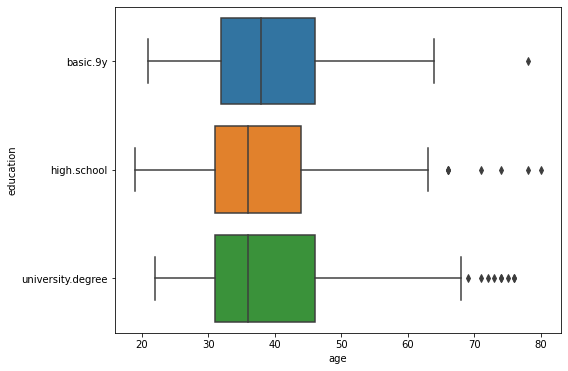

In [37]:
top_3 = (
    df.education.value_counts().sort_values(ascending=False).head(3).index.values
)
sns.boxplot(
    y="education", x="age", data=df[df.education.isin(top_3)], orient="h"
)
plt.savefig('AgeOfTop3Cust.')